**Implementing Course 1 using Tensorflow:**

* `Tensorflow` is a machine learning package
* `Keras` is a framework integrated with `Tensorflow`

In [41]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

* Neuron without activation (Actually linear activation)

Text(0.5, 0, 'House size (in sqrt)')

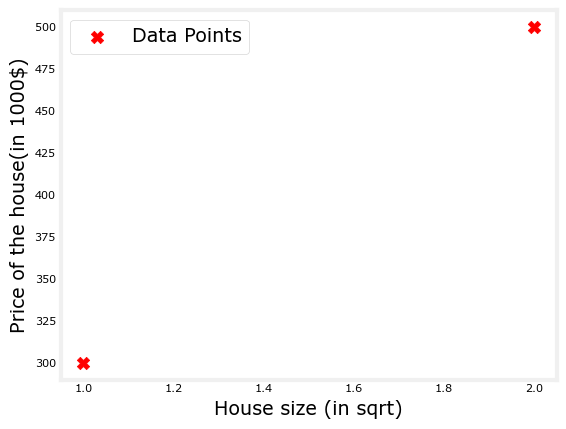

In [42]:
# Tensorflow expect 2D
X_train = np.array([[1.0],
                    [2.0]], dtype=np.float32)
Y_train = np.array([[300.0],
                    [500.0]], dtype=np.float32)

fit, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, c='r',marker='X',s=80, label='Data Points')
ax.legend(fontsize='xx-large')
ax.set_ylabel('Price of the house(in 1000$)',fontsize='xx-large')
ax.set_xlabel('House size (in sqrt)',fontsize='xx-large')

In [43]:
X_train.shape

(2, 1)

* Linear activation / Linear Model / Linear Regression

In [ ]:
# Direct layer
linear_layer = tf.keras.layers.Dense(units=1, activation='linear')

In [45]:
# Weights
linear_layer.get_weights() # there is no weights

[]

In [46]:
X_train[0].shape; print(X_train[0].reshape(1,1))

[[1.]]


In [47]:
# Now it will automatically instansite weights
a1 = linear_layer(X_train[0].reshape(1,1)) # tf expect 2D
print(a1)

tf.Tensor([[0.26]], shape=(1, 1), dtype=float32)


In [48]:
w, b = linear_layer.get_weights()
print(f"Random weights: w = {w}, b={b}")

Random weights: w = [[0.26]], b=[0.]


In [49]:
# set known weights
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [50]:
a1 = linear_layer(X_train[0].reshape(1, 1))
print(a1)
alin = np.dot(set_w, X_train[0].reshape(1, 1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [51]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b
print(prediction_tf)

tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32)


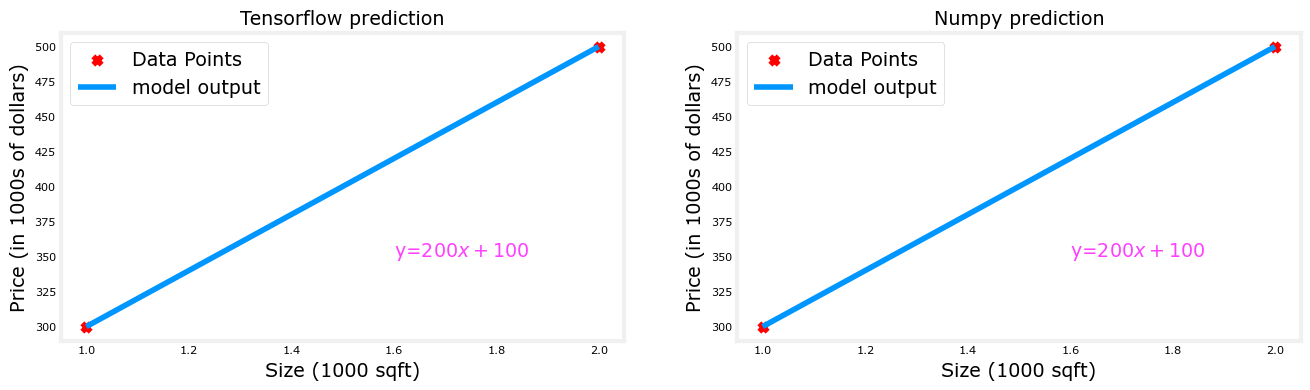

In [52]:
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

* Neuron with Sigmoid Activation

In [53]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [54]:
print(X_train.shape); print(); print(Y_train.shape)

(6, 1)

(6, 1)


In [55]:
x_pos = Y_train == 1 # Malignant
x_neg = Y_train == 0 # benign

In [56]:
X_train[x_pos]

array([3., 4., 5.], dtype=float32)

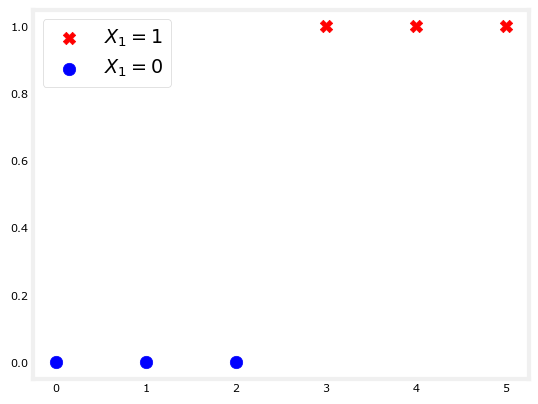

In [57]:
fig, ax = plt.subplots(1,1)
ax.scatter(X_train[x_pos], Y_train[x_pos], s=80, c='r',marker='X', label='$X_1=1$')
ax.scatter(X_train[x_neg], Y_train[x_neg], s=80, c='b',marker='o', label='$X_1=0$')
ax.legend(fontsize='xx-large')
plt.show()

In [59]:
# input_dim = 1 means number of features is 1
model = Sequential(
    [
    tf.keras.layers.Dense(1,
                          input_dim=1, # Not understood
                          activation='sigmoid',
                          name='L1')
    ]
)

In [60]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [61]:
logistic_layer = model.get_layer('L1')
print(logistic_layer)

<Dense name=L1, built=True>


In [64]:
w, b = logistic_layer.get_weights()
print(f"Random weights-> w: {w}, b: {b}")
print(f"Weight shape-> w: {w.shape}, b: {b.shape}")

Random weights-> w: [[-1.09]], b: [0.]
Weight shape-> w: (1, 1), b: (1,)


In [65]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [66]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
[[0.01]]
[[0.01]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

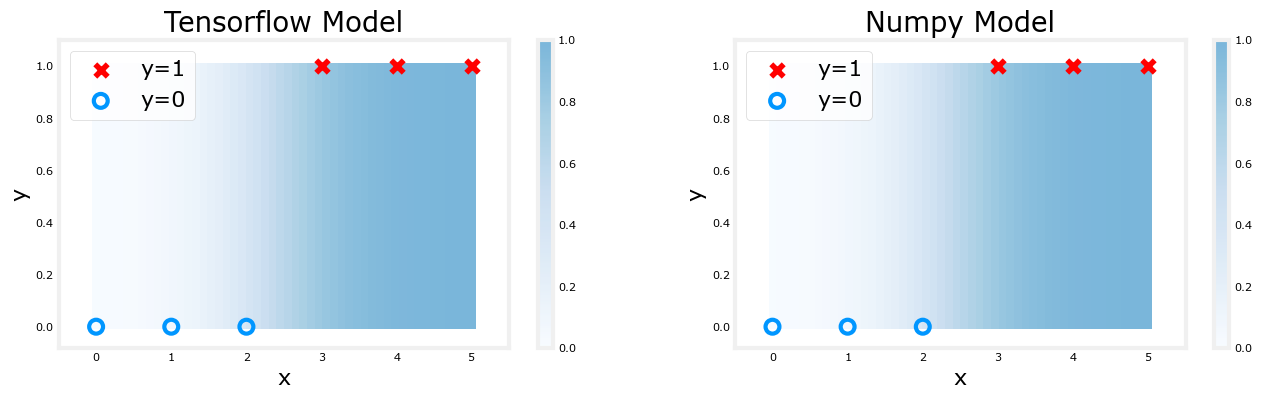

In [67]:
plt_logistic(X_train, Y_train, model, set_w, set_b, x_pos, x_neg)